데이터셋 출처: https://www.kaggle.com/datasets/ayushnitb/song-features-dataset-regressing-popularity/code
# 배경 및 문제 정의

음악 산업은 디지털 시대의 도래와 함께 급격한 변화를 겪고 있습니다. 
스트리밍 플랫폼의 등장으로 음악을 소비하는 방식이 크게 변화했으며, 
이제는 인기를 스트리밍 횟수나 재생 횟수로 측정하는 경향이 있습니다. 
결과적으로, 많은 음악 작업자들이 자신의 음악을 보다 넓은 청취자들에게 알리기 위한 전략을 구상하고 있습니다. 
노래의 특성을 분석함으로써 우리는 어떤 종류의 노래가 인기를 끌고 있는지에 대한 통찰력을 얻을 수 있습니다.
이러한 통찰력은 음악 작업자들이 자신의 작품을 더 잘 이해하고 성공적인 음악을 만들어 나갈 수 있도록 도와줍니다.

여러 음악적 특징을 사용하여 노래의 인기도 예측. 어떠한 음악적 특징이 인기도 예측에 유의미할 것인지 알아보고자 함.

회귀문제 - 보고자 하는 popularity 변수가 int로 연속형 변수이므로.

# 변수 설명
artist_name: 노래를 작곡한 아티스트의 이름입니다.

track_id: 노래를 고유하게 식별하는 트랙 ID입니다.

track_name: 노래의 제목입니다.

acousticness: 노래가 얼마나 비음악적인 요소를 가지고 있는지를 나타내는 지표입니다. 값이 낮을수록 음악이 비음향적이며, 값이 높을수록 음악이 음향적입니다.

danceability: 노래가 춤추기 쉬운 정도를 나타내는 지표입니다. 값이 높을수록 춤추기 쉬운 노래입니다.

duration_ms: 노래의 재생 시간(밀리초)입니다.

energy: 노래의 에너지 레벨을 나타내는 지표입니다. 값이 높을수록 노래가 활기차고 강렬합니다.

instrumentalness: 노래가 음악적 악기를 포함하는 정도를 나타내는 지표입니다. 값이 높을수록 노래가 주로 음악적 악기로 이루어져 있습니다.

key: 음악의 주요 조키(음계)입니다.

liveness: 노래가 라이브 음악인지를 나타내는 지표입니다. 값이 높을수록 라이브 성능에 가깝습니다.

loudness: 노래의 음량을 나타내는 지표입니다. 값이 높을수록 음량이 높습니다.

mode: 노래의 음계 모드를 나타내는 지표입니다. 이진값(0 또는 1)으로, 주요 키(0) 또는 마이너 키(1)를 나타냅니다.

speechiness: 노래에서 말하는 부분의 존재 여부와 비율을 나타내는 지표입니다. 값이 높을수록 음악이 말하는 부분을 포함합니다.

tempo: 노래의 박자 속도(분당 비트 수)를 나타내는 지표입니다.

time_signature: 노래의 시간 서명을 나타내는 지표입니다. 이 값은 각 마디에 포함된 박자 수를 나타냅니다.

valence: 노래의 긍정성 또는 부정성 정도를 나타내는 지표입니다. 값이 높을수록 긍정적인 감정을 느낄 수 있습니다.

popularity: 노래의 인기도를 나타내는 지표입니다. 이 값은 스트리밍 또는 재생 횟수를 기반으로 측정될 수 있습니다.

# 데이터 전처리

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
import pandas as pd
music=pd.read_csv(r"C:\Users\BIG3-06\Documents\KDT_Bigdata_7\통계\Day5\SpotifySongPolularityAPIExtract.csv")
music.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,238373,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,214800,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,138913,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,125381,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,124016,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [12]:
music.columns

Index(['artist_name', 'track_id', 'track_name', 'acousticness', 'danceability',
       'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence',
       'popularity'],
      dtype='object')

In [13]:
music.dtypes

artist_name          object
track_id             object
track_name           object
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                   int64
liveness            float64
loudness            float64
mode                  int64
speechiness         float64
tempo               float64
time_signature        int64
valence             float64
popularity            int64
dtype: object

In [14]:
music.shape

(130663, 17)

In [15]:
music.isnull().sum()
# 결측치값이 나왔지만 track_name은 분석에 있어 사용하지 않는 열이므로 특별한 결측치 처리를 하지 않음.

artist_name         0
track_id            0
track_name          1
acousticness        0
danceability        0
duration_ms         0
energy              0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
time_signature      0
valence             0
popularity          0
dtype: int64

In [16]:
# 노래 길이 초단위에서 분단위로 변환

music['duration_ms'] = music['duration_ms']/60000
music = music.rename(columns = {'duration_ms':'duration_min'})
music.head()

,artist_name,track_id,track_name,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
0,YG,2RM4jf1Xa9zPgMGRDiht8O,"Big Bank feat. 2 Chainz, Big Sean, Nicki Minaj",0.005820,0.743,3.972883,0.339,0.000,1,0.0812,-7.678,1,0.4090,203.927,4,0.118,15
1,YG,1tHDG53xJNGsItRA3vfVgs,BAND DRUM (feat. A$AP Rocky),0.024400,0.846,3.580000,0.557,0.000,8,0.2860,-7.259,1,0.4570,159.009,4,0.371,0
2,R3HAB,6Wosx2euFPMT14UXiWudMy,Radio Silence,0.025000,0.603,2.315217,0.723,0.000,9,0.0824,-5.890,0,0.0454,114.966,4,0.382,56
3,Chris Cooq,3J2Jpw61sO7l6Hc7qdYV91,Lactose,0.029400,0.800,2.089683,0.579,0.912,5,0.0994,-12.118,0,0.0701,123.003,4,0.641,0
4,Chris Cooq,2jbYvQCyPgX3CdmAzeVeuS,Same - Original mix,0.000035,0.783,2.066933,0.792,0.878,7,0.0332,-10.277,1,0.0661,120.047,4,0.928,0


In [17]:
music.duplicated().sum()

0

In [18]:
# 기술 통계량 확인
summary = music.describe()
summary

,acousticness,danceability,duration_min,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,popularity
count,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000,130663.000000
mean,0.342500,0.581468,3.543885,0.569196,0.224018,5.231894,0.194886,-9.974006,0.607739,0.112015,119.473353,3.878986,0.439630,24.208988
std,0.345641,0.190077,2.052584,0.260312,0.360328,3.602701,0.167733,6.544379,0.488256,0.124327,30.159636,0.514403,0.259079,19.713191
min,0.000000,0.000000,0.053383,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.031600,0.459000,2.732042,0.396000,0.000000,2.000000,0.097500,-11.898000,0.000000,0.038900,96.014000,4.000000,0.224000,7.000000
50%,0.203000,0.605000,3.365017,0.603000,0.000149,5.000000,0.124000,-7.979000,1.000000,0.055900,120.027000,4.000000,0.420000,22.000000
75%,0.636000,0.727000,4.017458,0.775000,0.440000,8.000000,0.236000,-5.684000,1.000000,0.129000,139.642000,4.000000,0.638000,38.000000
max,0.996000,0.996000,93.500333,1.000000,1.000000,11.000000,0.999000,1.806000,1.000000,0.966000,249.983000,5.000000,1.000000,100.000000


#### 데이터 분석 기법 선저이 이유 및 얻고자 하는 결과
분석 기법: 의사결정 나무

이유: 어떤 음악적 특징이 인기도에 유의미한 영향을 미치는지에 대해 파악하고 각 feature의 중요도를 평가하기 위함.

# 데이터 분석 모델링

In [21]:
#다중 선형회귀
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.preprocessing import StandardScaler

X=music[['acousticness', 'danceability',
       'duration_min', 'energy', 'instrumentalness', 'key', 'liveness',
       'loudness', 'mode', 'speechiness', 'tempo']]
Y=music['popularity']
# Get the original column names before scaling
original_column_names = list(X.columns)
original_column_names.insert(0, 'const')  # Insert 'const' at the beginning


# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Add constant term to input for intercept
X_scaled = sm.add_constant(X_scaled)
# Fit OLS model
model = sm.OLS(Y, X_scaled).fit()

# Calculate R-squared
r_squared = model.rsquared

# Summary report with p-values
summary = model.summary(xname=original_column_names)

print("R-squared:", r_squared)
print(summary)

R-squared: 0.08039968202396475
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.080
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     1038.
Date:                Thu, 16 May 2024   Prob (F-statistic):               0.00
Time:                        09:41:59   Log-Likelihood:            -5.6947e+05
No. Observations:              130663   AIC:                         1.139e+06
Df Residuals:                  130651   BIC:                         1.139e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const    

#### R-squared: 0.08039968202396486로 낮게 나와 회귀 모델이 종속 변수의 변동성을 크게 설명하지 못함. 따라서, 의사결정 나무 사용.

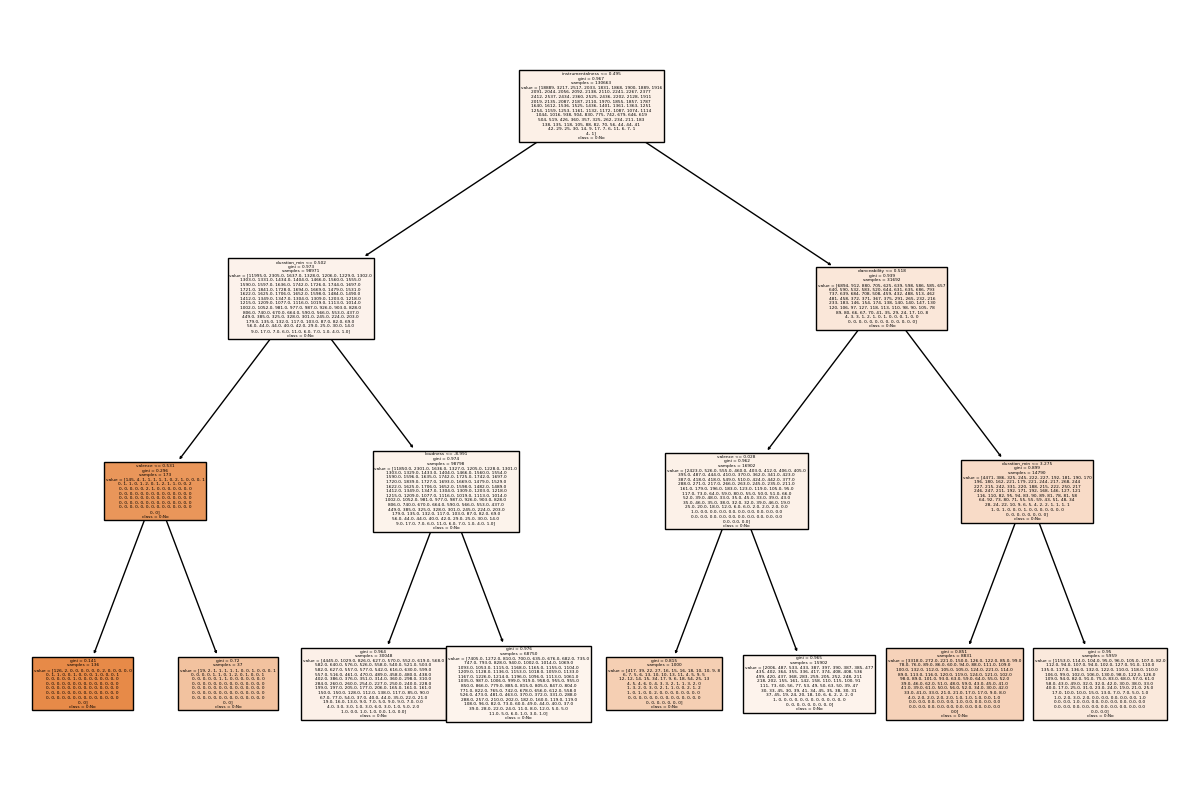

In [22]:
#의사결정 나무
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X = music[['time_signature', 'instrumentalness', 'key', 'danceability', 'loudness',
           'duration_min', 'valence', 'acousticness', 'energy', 'liveness', 'tempo']]
y = music['popularity']

# 의사결정 트리 모델링
from sklearn.tree import DecisionTreeClassifier


model_dt = DecisionTreeClassifier(max_depth=3) 
model_dt.fit(X, y)


# 모델 시각화
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model_dt, filled=True, feature_names=list(X.columns), class_names=['0:No', '1:Yes'])
plt.savefig('2.png', dpi=300)
plt.show()

In [23]:
# 특성중요도

importances = model_dt.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
1,instrumentalness,0.303308
3,danceability,0.254161
5,duration_min,0.247025
6,valence,0.106774
4,loudness,0.088732
0,time_signature,0.000000
2,key,0.000000
7,acousticness,0.000000
8,energy,0.000000
9,liveness,0.000000


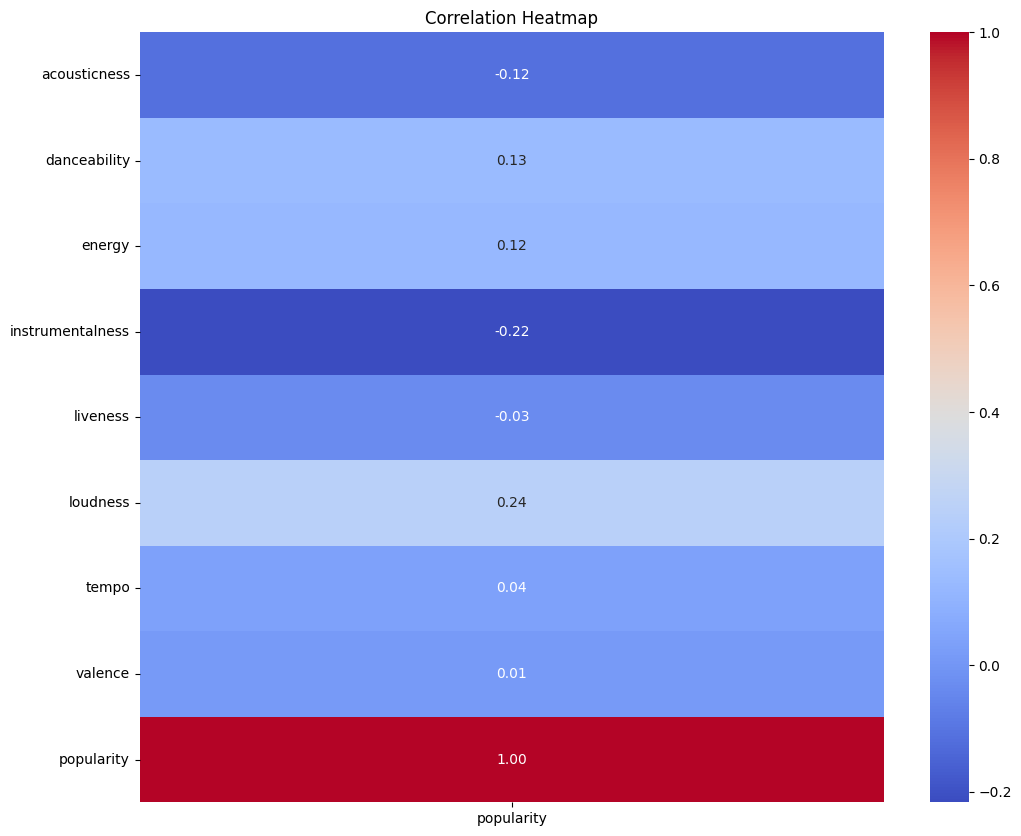

In [24]:
#노래 인기에 영퍙 미치는 요소
# 데이터셋에서 'popularity'와 다른 열 간의 상관 계수 계산
correlation_matrix = music[['acousticness','danceability','energy','instrumentalness','liveness','loudness','tempo','valence','popularity']].corr()

# 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.loc[:, ['popularity']], annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# loudness(양), instrumentalness(음)가 가장 높게 나왔지만 상관관계값은 낮음


In [25]:
from scipy.stats import pearsonr
#노래 데시벨과 인기도는 관계가 있다.
correlation, p_value = pearsonr(music['popularity'], music['loudness'])

# 결과 출력
print(f"상관 계수: {correlation}")
print(f"p-value: {p_value}")

# p-value와 유의수준(alpha) 비교
alpha = 0.05
if p_value < alpha:
    print("귀무가설 기각. 통계적으로 유의미한 수준으로 연관성이 있음.")
else:
    print("귀무가설 기각할 수 없음. 통계적으로 유의미한 수준으로 연관성이 없음.")

상관 계수: 0.244087555144606
p-value: 0.0
귀무가설 기각. 통계적으로 유의미한 수준으로 연관성이 있음.


C:\Users\BIG3-06\AppData\Local\Temp\ipykernel_3936\704822074.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="track_name", y="popularity", data=top10_songs, palette="Set2")


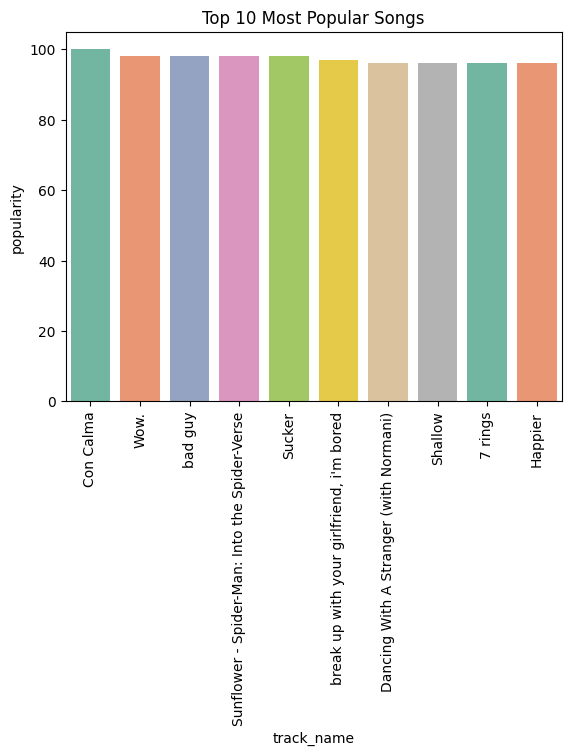

In [28]:
popular_song = music.sort_values("popularity", ascending=False)

# select top 10 rows of sorted data
top10_songs = popular_song[:10]

# create bar plot of top 10 fares
sns.barplot(x="track_name", y="popularity", data=top10_songs, palette="Set2")

# display plot
plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Songs')
plt.show()

C:\Users\BIG3-06\AppData\Local\Temp\ipykernel_3936\3428144630.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="track_name", y="loudness", data=top10_songs, palette="Set2")


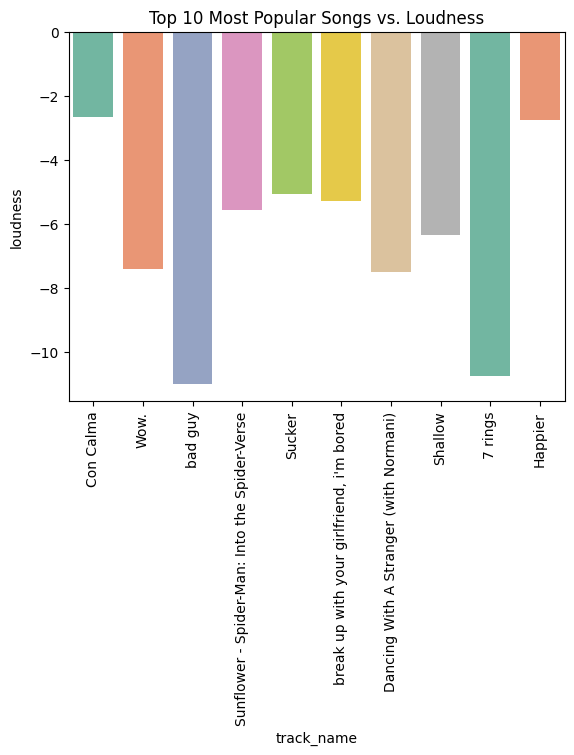

In [29]:
sns.barplot(x="track_name", y="loudness", data=top10_songs, palette="Set2")

plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Songs vs. Loudness')
plt.show()

##### 데이터 세트에서 가장 인기 있는 상위 10개 노래 중 각 노래의 음량 수준이 -12dB보다 큰 것으로 나타났습니다.

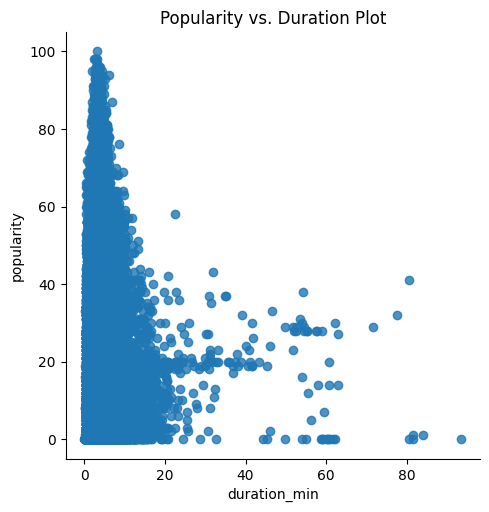

In [30]:
# 노래 길이에 따른 인기도
sns.lmplot(data=music, x='duration_min', y='popularity', fit_reg=False)

plt.title('Popularity vs. Duration Plot')
plt.show()

#20분에 가장 높은 분포이므로 20분 미만으로 범위 제한

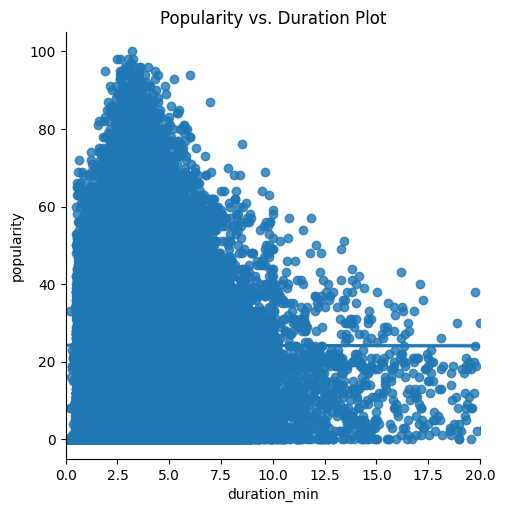

In [31]:
sns.lmplot(data=music, x='duration_min', y='popularity')

plt.xlim(0,20)
plt.title('Popularity vs. Duration Plot')
plt.show()
#2.5~5.0분 사이 노래가 가장 인기 높음

C:\Users\BIG3-06\AppData\Local\Temp\ipykernel_3936\1030972197.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="track_name", y="duration_min", data=top10_songs, palette="Set2")


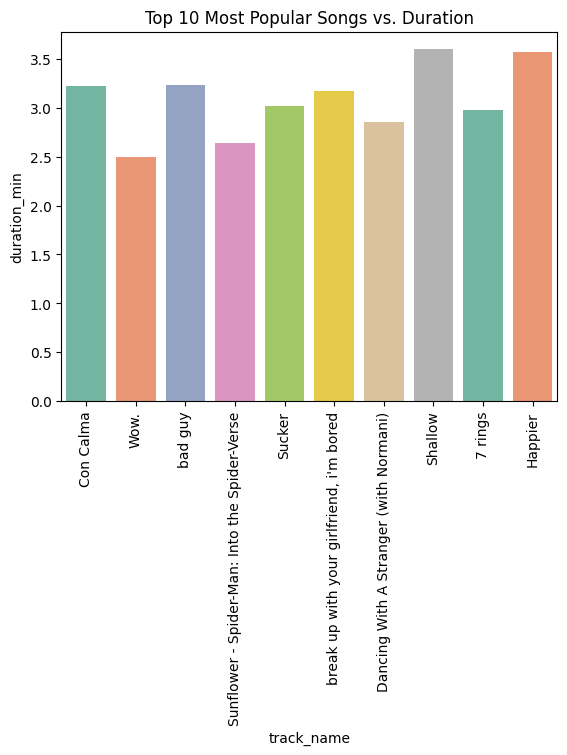

In [33]:
sns.barplot(x="track_name", y="duration_min", data=top10_songs, palette="Set2")

plt.xticks(rotation=90)
plt.title('Top 10 Most Popular Songs vs. Duration')
plt.show()

In [34]:
# 어떤 모드(장조, 단조)가 가장 인기? x=minor, y=major

minor = music[music['mode']==0].groupby('popularity',as_index=False).count()
major = music[music['mode']==1].groupby('popularity',as_index=False).count()
# 필요한 열만 추출하여 새로운 데이터프레임 생성
mode_x = minor[['popularity', 'mode']].copy()
mode_y = major[['popularity', 'mode']].copy()

# 두 데이터프레임을 하나로 합침
new_sd = pd.concat([mode_x, mode_y.rename(columns={'mode': 'mode_x'})], axis=1)

# 필요 없는 열 삭제
new_sd.drop(columns=['popularity'], inplace=True)

print(new_sd)

    mode   mode_x
0   7632  11257.0
1   1272   1945.0
2    992   1525.0
3    724   1309.0
4    697   1134.0
..   ...      ...
95     1      5.0
96     2      5.0
97     1      2.0
98     2      NaN
99     1      NaN

[100 rows x 2 columns]


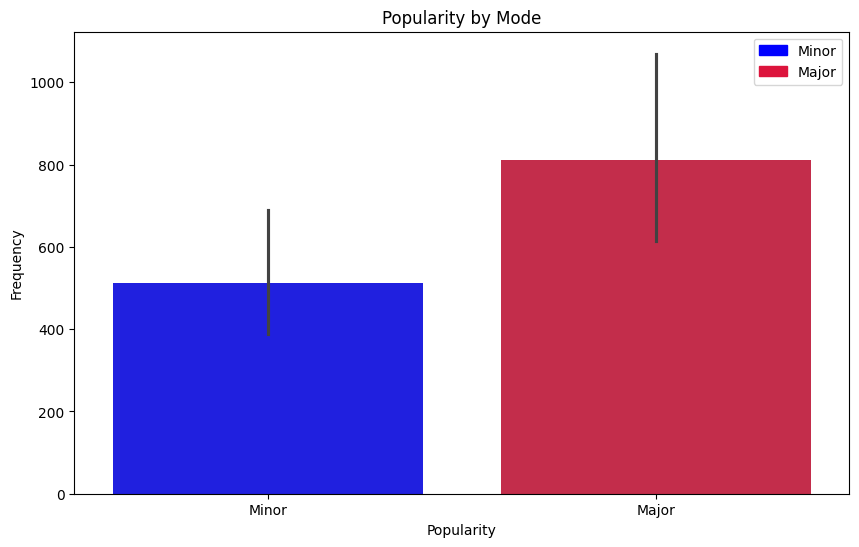

In [35]:
plt.figure(figsize=(10,6))
sns.barplot(data=new_sd, palette=['blue', 'crimson'])

plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Popularity by Mode')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color='blue', label='Minor'),
                    plt.Rectangle((0,0),1,1, color='crimson', label='Major')])
plt.xticks([0, 1], ['Minor', 'Major'])
plt.show()

# 분석 결과 해석 및 인사이트 제안

1. 음악적 특성이 instrumentalness, danceability, duration_min, valence, loudness 순으로 중요도가 높았다.
2. 히트맵 결과 loudness(양의 관계), instrumentalness(음의 관계)가 가장 높게 나왔지만 상관관계값은 낮음
3. loudness과 인기도는 관계가 있다. 가장 인기 있는 상위 10개 노래 중 각 노래의 음량 수준이 -12dB보다 큰 것으로 나타났다.
4. 노래 길이에 따른 인기도는 2.5~5.0분 사이 노래가 가장 인기 높다. 가장 인기 있는 상위 10개 노래에서도 2.5~5.0 사이의 음악으로 구성되었다.
5. 어떤 mode(장조, 단조)가 인기도와 관련이 더 높은가에 대해서는 장조가 더 인기도와 관련이 높다.

이러한 결과에 대한 인사이트는 다음과 같습니다.

 - 인기 있는 음악은 음량이 낮고 지속 시간이 짧은 경향이 있고 메이저 모드 곡이 인기가 더 높은 경향이 있습니다.
 - 분석된 노래 특성 중 loudness은 노래 인기도와 가장 강한 상관관계를 나타냈으며, 다음으로 instrumentalness이 뒤따랐습니다.  
 - loudness과의 양의 상관관계는 소리가 큰 노래가 더 인기 있는 경향이 있음을 시사하고, instrumentalness과의 음의 상관관계는 악기 요소가 적은 노래가 더 인기가 있을 수 있음을 의미합니다. 그러나 상관관계 값이 상대적으로 낮기 때문에 다른 요인도 노래 인기에 기여할 수 있음을 나타내는 것이 중요합니다. 
 - 따라서, 음악을 만드는 창작자의 경우에는 음량, 음악의 시간, 장조, 악기 요소의 음악적 특징에 대해 집중하여 창작이 이루어진다면 인기도가 높은 음악을 창작할 수 있을 것입니다. 또한, 음악업계 산업 종사자의 측면에서도 위와 같은 유의미한 음악적 특징에 대해 초점을 맞추어 퍼블리싱할 음악을 셀렉하게 된다면 높은 수익을 얻을 수 있는 가능성이 높아질 것이라고 생각합니다.